# Wet Depth Compare: Historical, CN1, CN2, and Custom CN

The purpose of this notebook is to compare the monthly distributions of wet depths obtained from historical observations and future climate model projections.

Weather generators derived from these data sets use a generalized, 2 parameter gamma distribution to represent the distribution of daily precipitation depth within each calendar month.

The four information sources are:

1. Historical from DayMet
2. CN1: 2021-2050 (selected downscaled climate model simulation results)
3. CN2: 2021-2050 (selected downscaled climate model simulation results)
4. Custom CN: 2031-2060 (selected downscaled climate model simulation results)


The generalized gamma distribution (SciPy gengamma) is defined using two shape parameters: 1) $a$ and 2) $c$. Because it is a generalized form, the location ($loc$) and scale ($scale$) can also be specified. The gamma distribution is a continuous distribution and can be fit to arbitrary data sets using the SciPy tools.

\begin{equation*}
    a > 0
\end{equation*}
\begin{equation*}
    c \ne 0
\end{equation*}

## Parameters and Imports

In [1]:
%matplotlib inline

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import datetime as dt
from copy import deepcopy
from IPython.display import display, HTML, Image
from scipy import stats as sstats
import math

In [3]:
IN_DIR1 = r'C:\Users\nmartin\Documents\EAA_HCP\Data\SwRI_Processed\Processed_Historical'
IN_DIR2 = r'C:\Users\nmartin\Documents\EAA_HCP\Data\SwRI_Processed\CombinedFuture'
IN_DIR3 = r'C:\Users\nmartin\Documents\EAA_HCP\Data\SwRI_Processed\DayMet_GridIntersect'
OUT_DIR = r'C:\Users\nmartin\Documents\EAA_HCP\Data\SwRI_Processed\CombinedFuture\WetDepth'

In [4]:
# full basin intersection dictionary
InFiler = os.path.normpath( os.path.join( IN_DIR3, "BasWeightsGDF.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    BasWeightsDF = pickle.load( IF )
# end with
BAS_KEYS = sorted( BasWeightsDF.keys() )

In [5]:
# plotting stuff
pmfYVals = np.linspace( 0.00, 1.0, 101, dtype=np.float32 )
xPTicks = [ 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, ]

In [6]:
colors = [ 'xkcd:cobalt blue', 'xkcd:ocean blue', 'xkcd:bright blue', 'xkcd:light grey blue', ]
labels = ["Obs. 1991-2020", "CN1 2021-2050", "CCN 2031-2060", "CN2 2051-2080",]

In [7]:
MonDict = { 1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul", 8 : "Aug",
            9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec", }
MonKeys = sorted( MonDict.keys() )

In [8]:
CutThresh = 0.255

## Wet Depths

In [9]:
# load the dictionaries.
InFiler = os.path.normpath( os.path.join( IN_DIR1, "Hist_FullB_WetDepth_1991through2020_MonDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    HistDict = pickle.load( IF )
# end with

In [10]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "CN1_FullB_WetDepth_2021through2050_MonDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    CN1Dict = pickle.load( IF )
# end with

In [11]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "CN2_FullB_WetDepth_2051through2080_MonDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    CN2Dict = pickle.load( IF )
# end with

In [12]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "CCN_FullB_WetDepth_2031through2060_MonDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    CCNDict = pickle.load( IF )
# end with

### Test

In [13]:
bas = BAS_KEYS[0]
bas

'Blanco'

In [14]:
HistMDepsDict = HistDict[bas]
CN1MDepsDict = CN1Dict[bas]
CN2MDepsDict = CN2Dict[bas]
CCNMDepsDict = CCNDict[bas]

In [15]:
mon = 7

In [16]:
cHistDeps = HistMDepsDict[mon]
cCN1Deps = CN1MDepsDict[mon]
cCN2Deps = CN2MDepsDict[mon]
cCCNDeps = CCNMDepsDict[mon]

In [17]:
# look at the fits first
npHist = np.array( cHistDeps, dtype=np.float32 )
npCN1 = np.array( cCN1Deps, dtype=np.float32 )
npCN2 = np.array( cCN2Deps, dtype=np.float32 )
npCCN = np.array( cCCNDeps, dtype=np.float32 )

In [18]:
HistMax = npHist.max()
CN1Max = npCN1.max()
CN2Max = npCN2.max()
CCNMax = npCCN.max()

In [19]:
HistMin = npHist.min()
CN1Min = npCN1.min()
CN2Min = npCN2.min()
CCNMin = npCCN.min()

In [20]:
HistMean = npHist.mean()
CN1Mean = npCN1.mean()
CN2Mean = npCN2.mean()
CCNMean = npCCN.mean()

In [21]:
HistMed = np.median( npHist )
CN1Med = np.median( npCN1 )
CN2Med = np.median( npCN2 )
CCNMed = np.median( npCCN )

In [22]:
HistVar = npHist.var()
CN1Var = npCN1.var()
CN2Var = npCN2.var()
CCNVar = npCCN.var()

In [23]:
HistCnt = len( npHist )
CN1Cnt = len( npCN1 )
CN2Cnt = len( npCN2 )
CCNCnt = len( npCCN )

In [24]:
fitsHist = sstats.gengamma.fit( npHist )
fitsCN1 = sstats.gengamma.fit( npCN1 )
fitsCN2 = sstats.gengamma.fit( npCN2 )
fitsCCN = sstats.gengamma.fit( npCCN )

In [25]:
fitsHist

(1.8537877499036086, 0.5426035488742231, 0.2747434333508115, 2.122773063967214)

In [26]:
fitsCN1

(0.7902135004585895, 1.0223864832258922, 0.264507415109303, 17.65248970435158)

In [27]:
fitsCN2

(0.8037710369313933,
 0.9679584077732657,
 0.2575081614575114,
 18.128396307087165)

In [28]:
fitsCCN

(1.0145262664384442,
 0.8683908031310524,
 0.2575081728212413,
 12.046239412083406)

In [29]:
sstats.gengamma.stats(fitsHist[0], fitsHist[1], loc=fitsHist[2], scale=fitsHist[3], moments='mvsk' )

(array(9.59053232), array(178.84819016), array(3.86898113), array(27.02615585))

In [30]:
sstats.gengamma.stats(fitsHist[0], fitsHist[1], loc=CutThresh, scale=fitsHist[3], moments='mvsk' )

(array(9.57078889), array(178.84819016), array(3.86898113), array(27.02615585))

In [31]:
HistMean, HistVar

(9.374065, 162.43916)

In [32]:
# hist
Hist_a = fitsHist[0]
Hist_c = fitsHist[1]
Hist_fLoc = fitsHist[2]
Hist_uLoc = CutThresh
Hist_scale = fitsHist[3]
# CN1
CN1_a = fitsCN1[0]
CN1_c = fitsCN1[1]
CN1_fLoc = fitsCN1[2]
CN1_uLoc = CutThresh
CN1_scale = fitsCN1[3]
# CN2
CN2_a = fitsCN2[0]
CN2_c = fitsCN2[1]
CN2_fLoc = fitsCN2[2]
CN2_uLoc = CutThresh
CN2_scale = fitsCN2[3]
# CCN
CCN_a = fitsCCN[0]
CCN_c = fitsCCN[1]
CCN_fLoc = fitsCCN[2]
CCN_uLoc = CutThresh
CCN_scale = fitsCCN[3]

In [33]:
MaxMax = round( max( [HistMax, CN1Max, CN2Max, CCNMax] ), -1 )
MaxMax

180.0

In [34]:
bins = np.arange( 0.0, MaxMax+2.0, step=2.0, dtype=np.float32 )
bins

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 130.,
       132., 134., 136., 138., 140., 142., 144., 146., 148., 150., 152.,
       154., 156., 158., 160., 162., 164., 166., 168., 170., 172., 174.,
       176., 178., 180.], dtype=float32)

In [35]:
yPTicks = [ 0.0, 0.05, 0.10, 0.15, ]

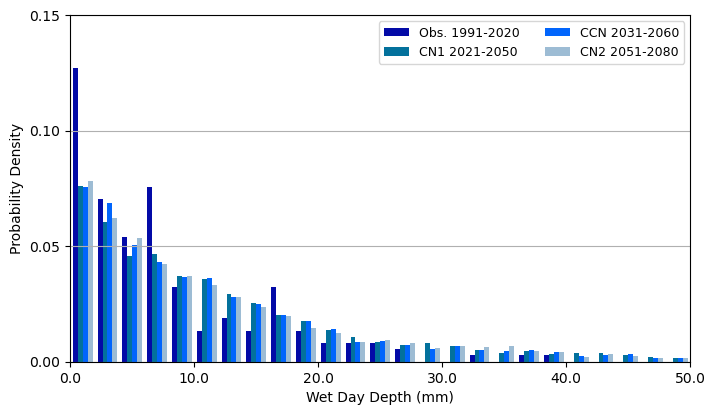

In [36]:
# plot normalized
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 4.5)
ax11 = Fig1.add_subplot(111)
histInfo = ax11.hist( [npHist, npCN1, npCCN, npCN2,], bins, density=True, histtype='bar', color=colors,
                      label=labels, )
ax11.set_xticks( xPTicks )
ax11.set_yticks( yPTicks )
ax11.set_ylabel('Probability Density', fontsize=10)
ax11.set_xlabel('Wet Day Depth (mm)', fontsize=10)
ax11.set_ylim( (yPTicks[0], yPTicks[len(yPTicks)-1]) )
ax11.set_xlim( (xPTicks[0], xPTicks[len(xPTicks)-1]) )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
ax11.legend( loc='upper right', fontsize=9, ncol=2 )
ax11.grid(visible=True, which='major', axis='y' )

In [37]:
HistFrG = sstats.gengamma( Hist_a, Hist_c, loc=Hist_uLoc, scale=Hist_scale )
CN1FrG = sstats.gengamma( CN1_a, CN1_c, loc=CN1_uLoc, scale=CN1_scale )
CCNFrG = sstats.gengamma( CCN_a, CCN_c, loc=CCN_uLoc, scale=CCN_scale )
CN2FrG = sstats.gengamma( CN2_a, CN2_c, loc=CN2_uLoc, scale=CN2_scale )

In [38]:
HistFrG.cdf( 30.0 ), HistFrG.cdf( 40.0 ), HistFrG.cdf( 50.0 ), HistFrG.cdf( 60.0 ), HistFrG.cdf( 70.0 )

(0.9348137151502032,
 0.9643295879344984,
 0.9793648942461896,
 0.9875591418798555,
 0.9922524822179256)

In [39]:
HistFrG.ppf( 0.99 ), CN1FrG.ppf( 0.99 ), CCNFrG.ppf( 0.99 ), CN2FrG.ppf( 0.99 )

(64.53533312066232, 70.52157440030464, 70.75711700245787, 78.90502841391779)

In [40]:
HistFrG.ppf( 0.95 ), CN1FrG.ppf( 0.95 ), CCNFrG.ppf( 0.95 ), CN2FrG.ppf( 0.95 )

(34.265116630880385, 44.774398210778685, 43.331048697919016, 48.96099754153154)

In [41]:
HistFrG.ppf( 0.05 ), CN1FrG.ppf( 0.05 ), CCNFrG.ppf( 0.05 ), CN2FrG.ppf( 0.05 )

(0.48349545849509523,
 0.6546327275220191,
 0.6723352988538562,
 0.6119324878837618)

In [42]:
HistFrG.cdf( 25.4 ), CN1FrG.cdf( 25.4 ), CCNFrG.cdf( 25.4 ), CN2FrG.cdf( 25.4 )

(0.9117976218051574,
 0.8292879721756002,
 0.8461402307279142,
 0.8126178808704487)

In [43]:
MaxMax = max( [HistFrG.pdf( bins ).max(), CN1FrG.pdf( bins ).max(), CCNFrG.pdf( bins ).max(), CN2FrG.pdf( bins ).max(), ] )
MaxMax

0.10973651743465915

In [44]:
yPTicks = [ 0.0, 0.03, 0.06, 0.09, 0.12, 0.15 ]

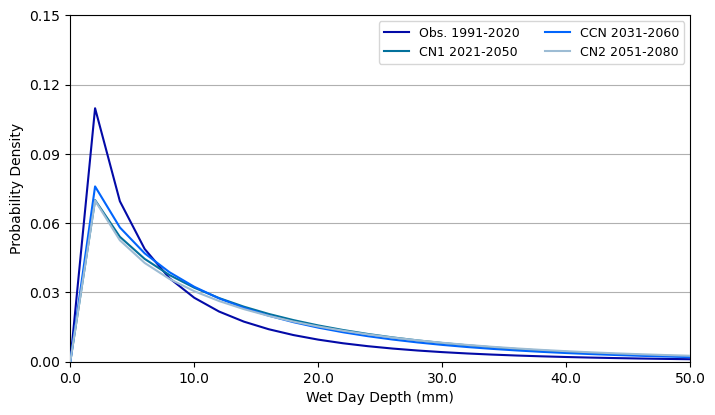

In [45]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 4.5)
ax11 = Fig1.add_subplot(111)
pdfHist, = ax11.plot( bins, HistFrG.pdf( bins ), color=colors[0], label=labels[0], 
                      linewidth=1.5, linestyle='-', zorder=5, )
pdfCN1, = ax11.plot( bins, CN1FrG.pdf( bins ), color=colors[1], label=labels[1], 
                     linewidth=1.5, linestyle='-', zorder=7, )
pdfCCN, = ax11.plot( bins, CCNFrG.pdf( bins ), color=colors[2], label=labels[2], 
                     linewidth=1.5, linestyle='-', zorder=9, )
pdfCN2, = ax11.plot( bins, CN2FrG.pdf( bins ), color=colors[3], label=labels[3], 
                     linewidth=1.5, linestyle='-', zorder=11, )
ax11.set_xticks( xPTicks )
ax11.set_yticks( yPTicks )
ax11.set_ylabel('Probability Density', fontsize=10)
ax11.set_xlabel('Wet Day Depth (mm)', fontsize=10)
ax11.set_ylim( (yPTicks[0], yPTicks[len(yPTicks)-1]) )
ax11.set_xlim( (xPTicks[0], xPTicks[len(xPTicks)-1]) )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
ax11.legend( loc='upper right', fontsize=9, ncol=2 )
ax11.grid(visible=True, which='major', axis='y' )

### Loop through All

Make the stats tracking DataFrame

In [46]:
ColNames = [ "HistObs_1991to2020", "CN1_2021to2050", "CCN_2031to2060", "CN2_2051to2080" ]

In [47]:
RowIndNames = [ "Counts (N)", "Max", "Mean", "Median", "Min", "Var", "gg_a", "gg_c", "gg_loc", "mt_loc", "gg_scale", "p0_05", "p0_50", "p0_95", "cp_1in" ]

In [48]:
StatsTrackTemplate = pd.DataFrame( 0, columns=ColNames, index=RowIndNames, dtype=np.float32 )

Now loop through all months and collate and make our outputs

In [49]:
for bas in BAS_KEYS:
    HistMDepsDict = HistDict[bas]
    CN1MDepsDict = CN1Dict[bas]
    CN2MDepsDict = CN2Dict[bas]
    CCNMDepsDict = CCNDict[bas]
    StatsTrackDict = dict()
    for mon in MonKeys:
        StatsTrackDict[mon] = StatsTrackTemplate.copy()
    # end for
    for mon in MonKeys:
        cLabel = MonDict[mon]
        cHistDeps = HistMDepsDict[mon]
        cCN1Deps = CN1MDepsDict[mon]
        cCN2Deps = CN2MDepsDict[mon]
        cCCNDeps = CCNMDepsDict[mon]
        npHist = np.array( cHistDeps, dtype=np.float32 )
        npCN1 = np.array( cCN1Deps, dtype=np.float32 )
        npCN2 = np.array( cCN2Deps, dtype=np.float32 )
        npCCN = np.array( cCCNDeps, dtype=np.float32 )
        # maximums
        HistMax = npHist.max()
        CN1Max = npCN1.max()
        CN2Max = npCN2.max()
        CCNMax = npCCN.max()
        StatsTrackDict[mon].at["Max", ColNames[0]] = HistMax
        StatsTrackDict[mon].at["Max", ColNames[1]] = CN1Max
        StatsTrackDict[mon].at["Max", ColNames[2]] = CCNMax
        StatsTrackDict[mon].at["Max", ColNames[3]] = CN2Max
        DepMax = round( max( [HistMax, CN1Max, CN2Max, CCNMax] ), -1 )
        bins = np.arange( 0.0, DepMax+1.0, step=1.0, dtype=np.float32 )
        # minimums
        HistMin = npHist.min()
        CN1Min = npCN1.min()
        CN2Min = npCN2.min()
        CCNMin = npCCN.min()
        StatsTrackDict[mon].at["Min", ColNames[0]] = HistMin
        StatsTrackDict[mon].at["Min", ColNames[1]] = CN1Min
        StatsTrackDict[mon].at["Min", ColNames[2]] = CCNMin
        StatsTrackDict[mon].at["Min", ColNames[3]] = CN2Min
        # means
        HistMean = npHist.mean()
        CN1Mean = npCN1.mean()
        CN2Mean = npCN2.mean()
        CCNMean = npCCN.mean()
        StatsTrackDict[mon].at["Mean", ColNames[0]] = HistMean
        StatsTrackDict[mon].at["Mean", ColNames[1]] = CN1Mean
        StatsTrackDict[mon].at["Mean", ColNames[2]] = CCNMean
        StatsTrackDict[mon].at["Mean", ColNames[3]] = CN2Mean
        # medians
        HistMed = np.median( npHist )
        CN1Med = np.median( npCN1 )
        CN2Med = np.median( npCN2 )
        CCNMed = np.median( npCCN )
        StatsTrackDict[mon].at["Median", ColNames[0]] = HistMed
        StatsTrackDict[mon].at["Median", ColNames[1]] = CN1Med
        StatsTrackDict[mon].at["Median", ColNames[2]] = CCNMed
        StatsTrackDict[mon].at["Median", ColNames[3]] = CN2Med
        # variances
        HistVar = npHist.var()
        CN1Var = npCN1.var()
        CN2Var = npCN2.var()
        CCNVar = npCCN.var()
        StatsTrackDict[mon].at["Var", ColNames[0]] = HistVar
        StatsTrackDict[mon].at["Var", ColNames[1]] = CN1Var
        StatsTrackDict[mon].at["Var", ColNames[2]] = CCNVar
        StatsTrackDict[mon].at["Var", ColNames[3]] = CN2Var
        # counts
        HistCnt = len( npHist )
        CN1Cnt = len( npCN1 )
        CN2Cnt = len( npCN2 )
        CCNCnt = len( npCCN )
        StatsTrackDict[mon].at["Counts (N)", ColNames[0]] = HistCnt
        StatsTrackDict[mon].at["Counts (N)", ColNames[1]] = CN1Cnt
        StatsTrackDict[mon].at["Counts (N)", ColNames[2]] = CCNCnt
        StatsTrackDict[mon].at["Counts (N)", ColNames[3]] = CN2Cnt
        # now do fits and extract parameters
        fitsHist = sstats.gengamma.fit( npHist )
        fitsCN1 = sstats.gengamma.fit( npCN1 )
        fitsCN2 = sstats.gengamma.fit( npCN2 )
        fitsCCN = sstats.gengamma.fit( npCCN )
        #   parameters extract
        #       hist
        Hist_a = fitsHist[0]
        Hist_c = fitsHist[1]
        Hist_fLoc = fitsHist[2]
        Hist_uLoc = CutThresh
        Hist_scale = fitsHist[3]
        StatsTrackDict[mon].at["gg_a", ColNames[0]] = Hist_a
        StatsTrackDict[mon].at["gg_c", ColNames[0]] = Hist_c
        StatsTrackDict[mon].at["gg_loc", ColNames[0]] = Hist_fLoc
        StatsTrackDict[mon].at["mt_loc", ColNames[0]] = Hist_uLoc
        StatsTrackDict[mon].at["gg_scale", ColNames[0]] = Hist_scale
        #       CN1
        CN1_a = fitsCN1[0]
        CN1_c = fitsCN1[1]
        CN1_fLoc = fitsCN1[2]
        CN1_uLoc = CutThresh
        CN1_scale = fitsCN1[3]
        StatsTrackDict[mon].at["gg_a", ColNames[1]] = CN1_a
        StatsTrackDict[mon].at["gg_c", ColNames[1]] = CN1_c
        StatsTrackDict[mon].at["gg_loc", ColNames[1]] = CN1_fLoc
        StatsTrackDict[mon].at["mt_loc", ColNames[1]] = CN1_uLoc
        StatsTrackDict[mon].at["gg_scale", ColNames[1]] = CN1_scale
        #       CN2
        CN2_a = fitsCN2[0]
        CN2_c = fitsCN2[1]
        CN2_fLoc = fitsCN2[2]
        CN2_uLoc = CutThresh
        CN2_scale = fitsCN2[3]
        StatsTrackDict[mon].at["gg_a", ColNames[3]] = CN2_a
        StatsTrackDict[mon].at["gg_c", ColNames[3]] = CN2_c
        StatsTrackDict[mon].at["gg_loc", ColNames[3]] = CN2_fLoc
        StatsTrackDict[mon].at["mt_loc", ColNames[3]] = CN2_uLoc
        StatsTrackDict[mon].at["gg_scale", ColNames[3]] = CN2_scale
        #       CCN
        CCN_a = fitsCCN[0]
        CCN_c = fitsCCN[1]
        CCN_fLoc = fitsCCN[2]
        CCN_uLoc = CutThresh
        CCN_scale = fitsCCN[3]
        StatsTrackDict[mon].at["gg_a", ColNames[2]] = CCN_a
        StatsTrackDict[mon].at["gg_c", ColNames[2]] = CCN_c
        StatsTrackDict[mon].at["gg_loc", ColNames[2]] = CCN_fLoc
        StatsTrackDict[mon].at["mt_loc", ColNames[2]] = CCN_uLoc
        StatsTrackDict[mon].at["gg_scale", ColNames[2]] = CCN_scale
        # make frozen theoretical
        HistFrG = sstats.gengamma( Hist_a, Hist_c, loc=Hist_uLoc, scale=Hist_scale )
        CN1FrG = sstats.gengamma( CN1_a, CN1_c, loc=CN1_uLoc, scale=CN1_scale )
        CCNFrG = sstats.gengamma( CCN_a, CCN_c, loc=CCN_uLoc, scale=CCN_scale )
        CN2FrG = sstats.gengamma( CN2_a, CN2_c, loc=CN2_uLoc, scale=CN2_scale )
        #   get the PPF values for important probabilities
        Hist_p05 = HistFrG.ppf( 0.05 )
        CN1_p05 = CN1FrG.ppf( 0.05 )
        CCN_p05 = CCNFrG.ppf( 0.05 )
        CN2_p05 = CN2FrG.ppf( 0.05 )
        StatsTrackDict[mon].at["p0_05", ColNames[0]] = Hist_p05
        StatsTrackDict[mon].at["p0_05", ColNames[1]] = CN1_p05
        StatsTrackDict[mon].at["p0_05", ColNames[2]] = CCN_p05
        StatsTrackDict[mon].at["p0_05", ColNames[3]] = CN2_p05
        Hist_p50 = HistFrG.ppf( 0.50 )
        CN1_p50 = CN1FrG.ppf( 0.50 )
        CCN_p50 = CCNFrG.ppf( 0.50 )
        CN2_p50 = CN2FrG.ppf( 0.50 )
        StatsTrackDict[mon].at["p0_50", ColNames[0]] = Hist_p50
        StatsTrackDict[mon].at["p0_50", ColNames[1]] = CN1_p50
        StatsTrackDict[mon].at["p0_50", ColNames[2]] = CCN_p50
        StatsTrackDict[mon].at["p0_50", ColNames[3]] = CN2_p50
        Hist_p95 = HistFrG.ppf( 0.95 )
        CN1_p95 = CN1FrG.ppf( 0.95 )
        CCN_p95 = CCNFrG.ppf( 0.95 )
        CN2_p95 = CN2FrG.ppf( 0.95 )
        StatsTrackDict[mon].at["p0_95", ColNames[0]] = Hist_p95
        StatsTrackDict[mon].at["p0_95", ColNames[1]] = CN1_p95
        StatsTrackDict[mon].at["p0_95", ColNames[2]] = CCN_p95
        StatsTrackDict[mon].at["p0_95", ColNames[3]] = CN2_p95
        #    get cumulative probability for 1 inch
        Hist_1in = HistFrG.cdf( 25.4 )
        CN1_1in = CN1FrG.cdf( 25.4 )
        CCN_1in = CCNFrG.cdf( 25.4 )
        CN2_1in = CN2FrG.cdf( 25.4 )
        StatsTrackDict[mon].at["cp_1in", ColNames[0]] = Hist_1in
        StatsTrackDict[mon].at["cp_1in", ColNames[1]] = CN1_1in
        StatsTrackDict[mon].at["cp_1in", ColNames[2]] = CCN_1in
        StatsTrackDict[mon].at["cp_1in", ColNames[3]] = CN2_1in        
        # get the maximum probability density
        MaxPDen = max( [HistFrG.pdf( bins ).max(), CN1FrG.pdf( bins ).max(), CCNFrG.pdf( bins ).max(), 
                        CN2FrG.pdf( bins ).max(), ] )
        # allocate maximum pDen
        if MaxPDen < 0.15:
            MaxYPlot = 0.15
            yPTicks = [ 0.0, 0.03, 0.06, 0.09, 0.12, 0.15 ]
        elif MaxPDen < 0.20:
            MaxYPlot = 0.20
            yPTicks = [0.0, 0.05, 0.10, 0.15, 0.20]
        elif MaxPDen < 0.30:
            MaxYPlot = 0.30
            yPTicks = [0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, ]
        elif MaxPDen < 0.40:
            MaxYPlot = 0.40
            yPTicks = [0.0, 0.10, 0.20, 0.30, 0.40, ]
        else:
            MaxYPlot = 0.50
            yPTicks = [0.0, 0.10, 0.20, 0.30, 0.40, 0.50, ]
        # end if
        # do the plots
        #     plot normalized histograms
        OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_WetDep_Hist_%s.svg" % (bas, cLabel ) ) )
        OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_WetDep_Hist_%s.png" % (bas, cLabel ) ) )
        OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_WetDep_Hist_%s.pdf" % (bas, cLabel ) ) )
        Fig1 = plt.figure()
        Fig1.set_size_inches(8.0, 4.5)
        ax11 = Fig1.add_subplot(111)
        histInfo = ax11.hist( [npHist, npCN1, npCCN, npCN2,], bins, density=True, histtype='bar', color=colors,
                              label=labels, )
        ax11.set_xticks( xPTicks )
        ax11.set_yticks( yPTicks )
        ax11.set_ylabel('Probability Density', fontsize=10)
        ax11.set_xlabel('%s Wet Day Depth (mm)' % cLabel, fontsize=10)
        ax11.set_ylim( (yPTicks[0], yPTicks[len(yPTicks)-1]) )
        ax11.set_xlim( (xPTicks[0], xPTicks[len(xPTicks)-1]) )
        ax11.tick_params(axis='both', which='major', labelsize=10)
        ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
        ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
        ax11.legend( loc='upper right', fontsize=9, ncol=2 )
        ax11.grid(visible=True, which='major', axis='y' )
        Fig1.savefig( OutSVG, dpi=600.0 )
        Fig1.savefig( OutPNG, dpi=600.0 )
        Fig1.savefig( OutPDF, dpi=600.0 )
        # clear the figures
        plt.cla()
        plt.close(Fig1)
        #     plot PDFs
        OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_WetDep_PDFs_%s.svg" % (bas, cLabel ) ) )
        OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_WetDep_PDFs_%s.png" % (bas, cLabel ) ) )
        OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_WetDep_PDFs_%s.pdf" % (bas, cLabel ) ) )
        Fig1 = plt.figure()
        Fig1.set_size_inches(8.0, 4.5)
        ax11 = Fig1.add_subplot(111)
        pdfHist, = ax11.plot( bins, HistFrG.pdf( bins ), color=colors[0], label=labels[0], 
                              linewidth=1.5, linestyle='-', zorder=5, )
        pdfCN1, = ax11.plot( bins, CN1FrG.pdf( bins ), color=colors[1], label=labels[1], 
                             linewidth=1.5, linestyle='-', zorder=7, )
        pdfCCN, = ax11.plot( bins, CCNFrG.pdf( bins ), color=colors[2], label=labels[2], 
                             linewidth=1.5, linestyle='-', zorder=9, )
        pdfCN2, = ax11.plot( bins, CN2FrG.pdf( bins ), color=colors[3], label=labels[3], 
                             linewidth=1.5, linestyle='-', zorder=11, )
        ax11.set_xticks( xPTicks )
        ax11.set_yticks( yPTicks )
        ax11.set_ylabel('Probability Density', fontsize=10)
        ax11.set_xlabel('%s Wet Day Depth (mm)' % cLabel, fontsize=10)
        ax11.set_ylim( (yPTicks[0], yPTicks[len(yPTicks)-1]) )
        ax11.set_xlim( (xPTicks[0], xPTicks[len(xPTicks)-1]) )
        ax11.tick_params(axis='both', which='major', labelsize=10)
        ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
        ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
        ax11.legend( loc='upper right', fontsize=9, ncol=2 )
        ax11.grid(visible=True, which='major', axis='y' )
        Fig1.savefig( OutSVG, dpi=600.0 )
        Fig1.savefig( OutPNG, dpi=600.0 )
        Fig1.savefig( OutPDF, dpi=600.0 )
        # clear the figures
        plt.cla()
        plt.close(Fig1)
    # end of month for
    # now output the stats to a spreadsheet
    outXLSX = os.path.normpath( os.path.join( OUT_DIR, "%s_WetDayDepth_Stats.xlsx" % bas ) )
    writer = pd.ExcelWriter( outXLSX )
    workbook  = writer.book
    format1 = workbook.add_format({'num_format': '#,##0.00000'})
    for mon in MonKeys:
        cLabel = MonDict[mon]
        curDF = StatsTrackDict[mon]
        curDF.to_excel( writer, sheet_name=cLabel, index_label="Statistic" )
        # adjust columns
        writer.sheets[cLabel].set_column( 0, 0, 15 )
        for column in curDF:
            column_width = max(curDF[column].astype(str).map(len).max()+6, len(column)+6)
            col_idx = curDF.columns.get_loc(column)
            writer.sheets[cLabel].set_column(col_idx+1, col_idx+1, column_width, format1)
        # end column for
    # end month for
    writer.close()
# end basin for